In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [3]:
cwd = os.getcwd()
cancel = pd.read_csv(cwd + '/cancel.csv')

In [4]:
# get yearly flight info
infile = open('yearly_flights.pickle', 'rb')
yearly = pickle.load(infile)
infile.close()

In [310]:
yearly

{'Total Flights': 6951793,
 'Months': {'January Flights': 570118,
  'February Flights': 520731,
  'March Flights': 611987,
  'April Flights': 596046,
  'May Flights': 616529,
  'June Flights': 626193,
  'July Flights': 645299,
  'August Flights': 644673,
  'September Flights': 585749,
  'October Flights': 616101,
  'November Flights': 454162,
  'December Flights': 464205},
 'Seasons': {'Spring Flights': 1866428,
  'Summer Flights': 1910847,
  'Fall Flights': 1545252,
  'Winter Flights': 1629266},
 'Airlines': {'Endeavor Air': 205728,
  'American Airlines': 909554,
  'Alaska Airlines': 234333,
  'JetBlue': 303722,
  'Delta Airlines': 945194,
  'ExpressJet': 216089,
  'Frontier Airlines': 118871,
  'Allegiant Air': 80908,
  'Hawaiian Airlines': 82904,
  'Envoy Air': 245812,
  'Spirit Airlines': 172771,
  'PSA Airlines': 232630,
  'SkyWest Airlines': 767028,
  'United Airlines': 615683,
  'Virgin American': 30111,
  'SouthWest Airlines': 1347369,
  'Mesa Airlines': 178097,
  'Republic Air

## Monthly 

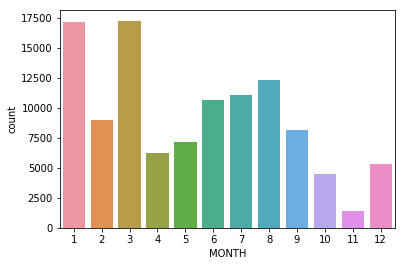

In [6]:
sns.countplot(cancel['MONTH'])

In [5]:
# charting how many cancelations for each month
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

month_ct = cancel['MONTH'].value_counts()
freq = [month_ct[x] for x in range(1,13)]

In [6]:
# find pct of cancelations per month
m = yearly['Months']
f = list(m.values())
m_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(f)):
    m_pct.append(round((freq[x]/f[x]) * 100,2))


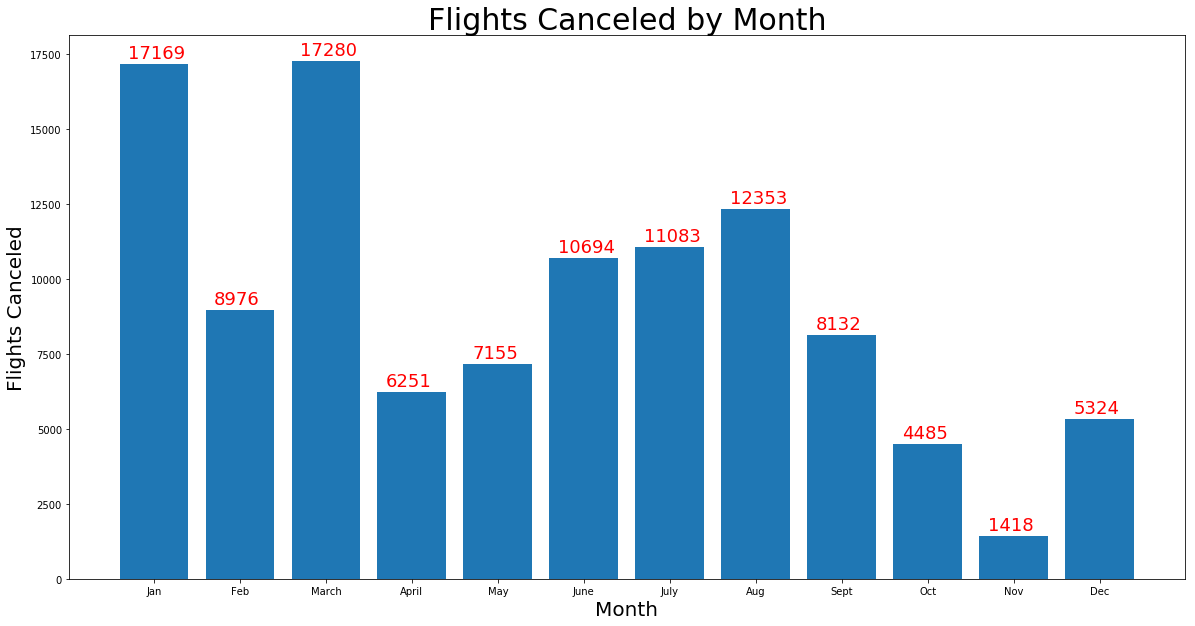

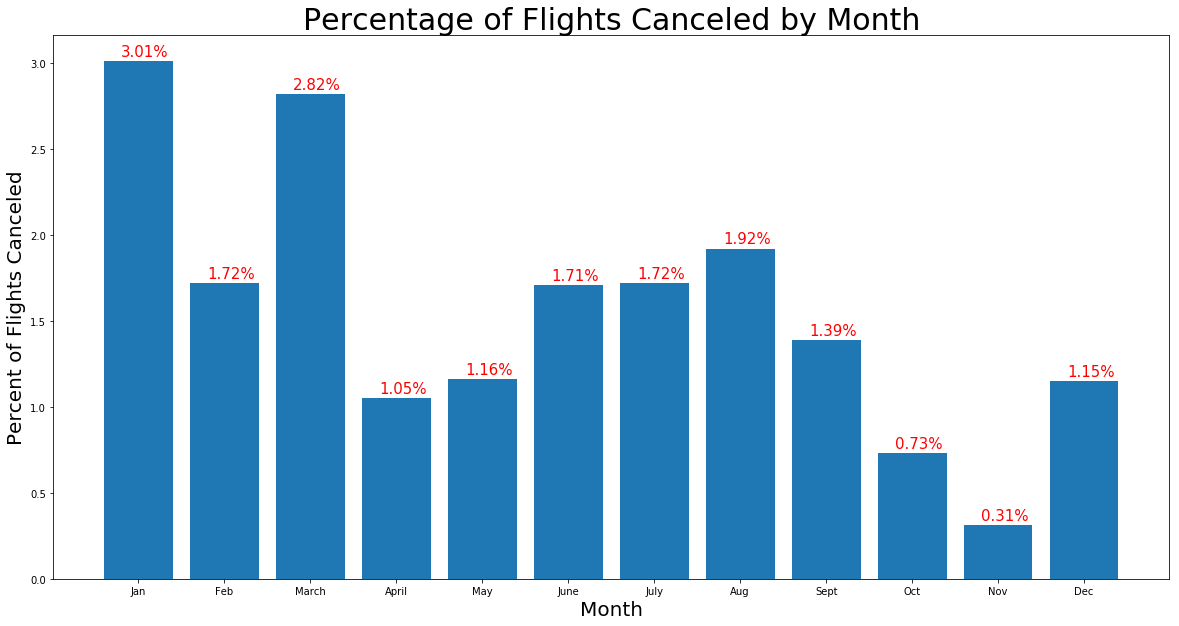

In [7]:
plt.figure(figsize=(20,10))
plt.bar(month, freq)
plt.title("Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.xticks(range(12))
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(range(12), freq):
    plt.text(a -.3 , b +200, str(b), fontsize =18,color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(month, m_pct)
plt.title("Percentage of Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.xticks(range(12))
plt.ylabel('Percent of Flights Canceled', fontsize =20)
for a,b in zip(range(12), m_pct):
    plt.text(a -.2, b + .03, str(b) + '%', fontsize =15, color ='r')
plt.show()

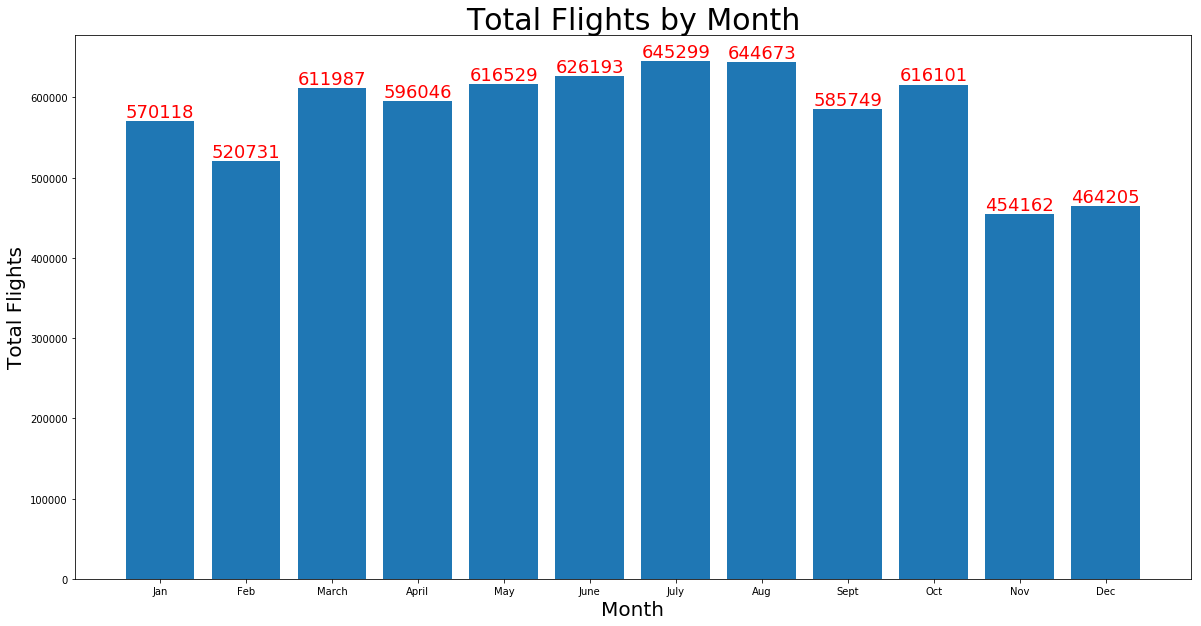

In [512]:
plt.figure(figsize=(20,10))
plt.bar(month, f)
plt.title("Total Flights by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.xticks(range(12))
plt.ylabel('Total Flights', fontsize =20)
for a,b in zip(range(12), f):
    plt.text(a -.4, b +5000, str(b), fontsize =18, color ='r')
plt.show()

## Seasonal 

In [8]:
# combine months into seasons of the year
cancel['FL_DATE'] = pd.to_datetime(cancel['FL_DATE'])
winter_start = '12-21-2017'
winter_end = '03-19-2018'
maskw = (cancel['FL_DATE'] >= winter_start) & (cancel['FL_DATE'] <= winter_end)
winter = cancel.loc[maskw]

spring_start = '03-20-2018'
spring_end = '06-20-2018'
masksp = (cancel['FL_DATE'] >= spring_start) & (cancel['FL_DATE'] <= spring_end)
spring = cancel.loc[masksp]

summer_start = '06-21-2018'
summer_end = '09-21-2018'
masksum = (cancel['FL_DATE'] >= summer_start) & (cancel['FL_DATE'] <= summer_end)
summer = cancel.loc[masksum]

fall_start = '11-01-2017'
fall_end = '12-20-2017'
aut_start = '09-22-2018'
aut_end = '10-31-2018'
maskf = (cancel['FL_DATE'] >= fall_start) & (cancel['FL_DATE'] <= fall_end)
maska = (cancel['FL_DATE'] >= aut_start) & (cancel['FL_DATE'] <= aut_end)
fall = cancel.loc[maskf]
aut = cancel.loc[maska]
fall = fall.append([aut])

In [9]:
season = ['Fall', "Winter", "Spring", "Summer"]
amt = [len(fall), len(winter), len(spring), len(summer)]

In [10]:
# find pct of cancelations per season
s = yearly['Seasons']
sea = list(s.values())
s_pct = []

#get a list of what % of flights were canceled per season
for x in range(len(s)):
    s_pct.append(round((amt[x]/sea[x]) * 100,2))

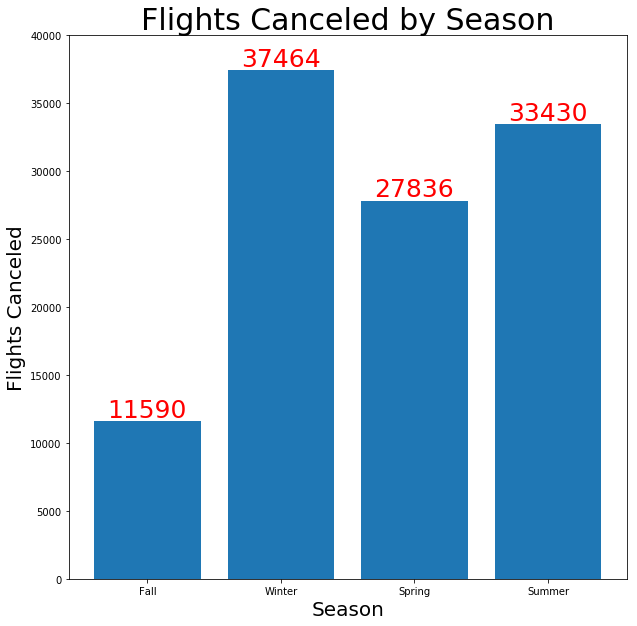

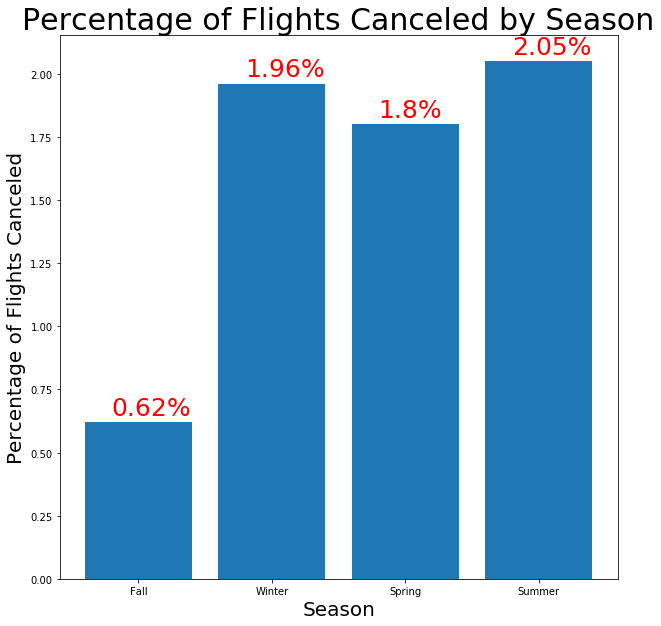

In [41]:
plt.figure(figsize=(10,10))
plt.bar(season, amt)
plt.title("Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Flights Canceled', fontsize =20)
plt.yticks(range(0, 45000, 5000))
for a,b in zip(range(4), amt):
    plt.text(a -.3 , b +300, str(b), fontsize =25, color ='r')
plt.show()

plt.figure(figsize=(10,10))
plt.bar(season, s_pct)
plt.title("Percentage of Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Percentage of Flights Canceled', fontsize =20)
for a,b in zip(range(4), s_pct):
    plt.text(a - .2, b +.03, str(b) + '%', fontsize =25, color ='r')
plt.show()

## Airline

#### <B><U> AIRLINE KEY
“9E” = ”ENDEAVOR AIR” <br>
"AA" = "AMERICAN AIRLINES' <br>
"AS" = "ALASKA AIRLINES"<br>
"B6" = "JETBLUE AIRLINES"<br>
"DL" = "DELTA AIRLINES"<br>
“EV” = “EXPRESSJET AIRLINES”<br> 
"F9" = "FRONTIER AIRLINES"<br>
"G4" = "ALLEGIANT AIR"<br>
"HA" = "HAWAIIAN AIRLINES"<br>
“MQ” = ”ENVOY AIR”<br>
"NK" = "SPIRIT AIRLINES"<br>
“OH” = ”PSA AIRLINES"<br>
“OO” = ”SKYWEST AIRLINES”<br>
"UA" = "UNITED AIRLINES"<br>
"VX” = ”VIRGIN AMERICA"<br>
"WN" = "SOUTHWEST AIRLINES"<br>
“YV” = ”MESA AIRLINES”<br>
“YX” = ”REPUBLIC AIRLINE”<br>

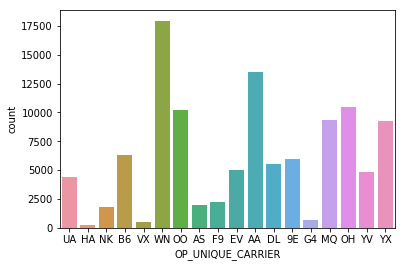

In [19]:
sns.countplot(cancel['OP_UNIQUE_CARRIER'])

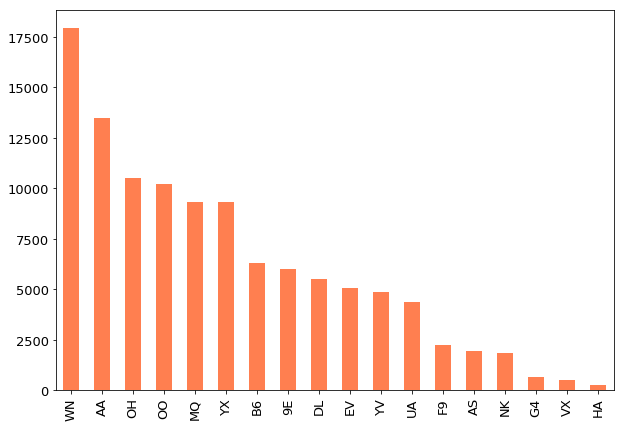

In [20]:
ax = cancel['OP_UNIQUE_CARRIER'].value_counts().plot(kind='bar', 
                    figsize=(10,7),color="coral", fontsize=13)

In [11]:
# get unique airlines and their counts
carrier = sorted(list(set(cancel['OP_UNIQUE_CARRIER'])))
c_ct = cancel['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in carrier]

In [12]:
# find pct of cancelations per airline
a = yearly['Airlines']
line = list(a.values())
a_pct = []

#get a list of what % of flights were canceled per airline
for x in range(len(a)):
    a_pct.append(round((carry[x]/line[x]) * 100,2))

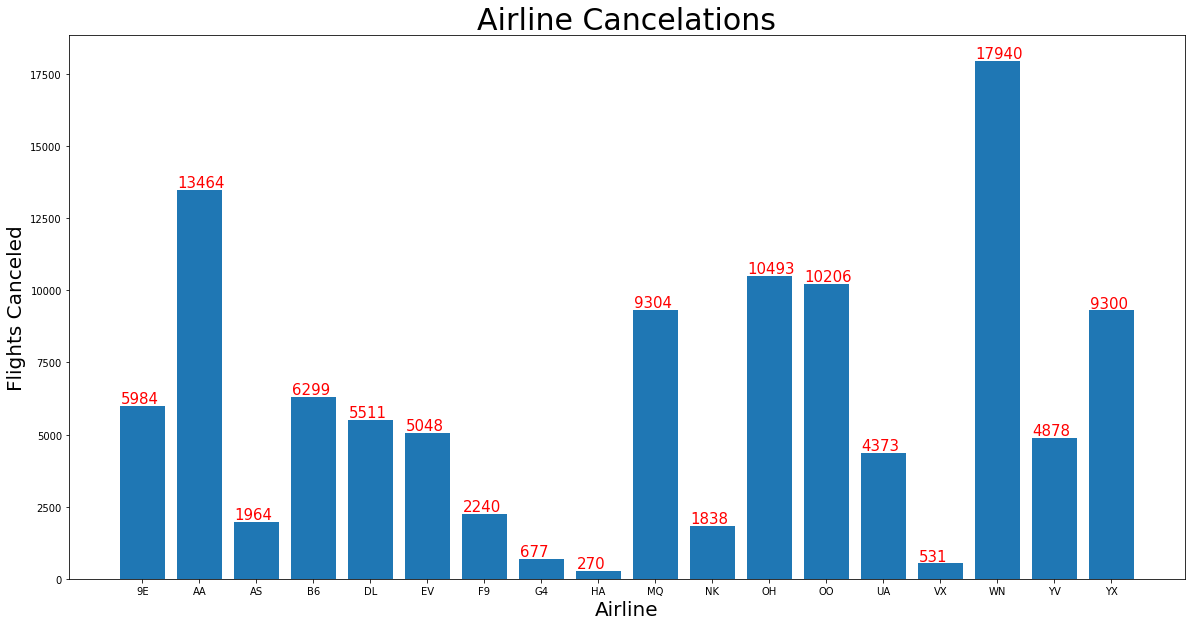

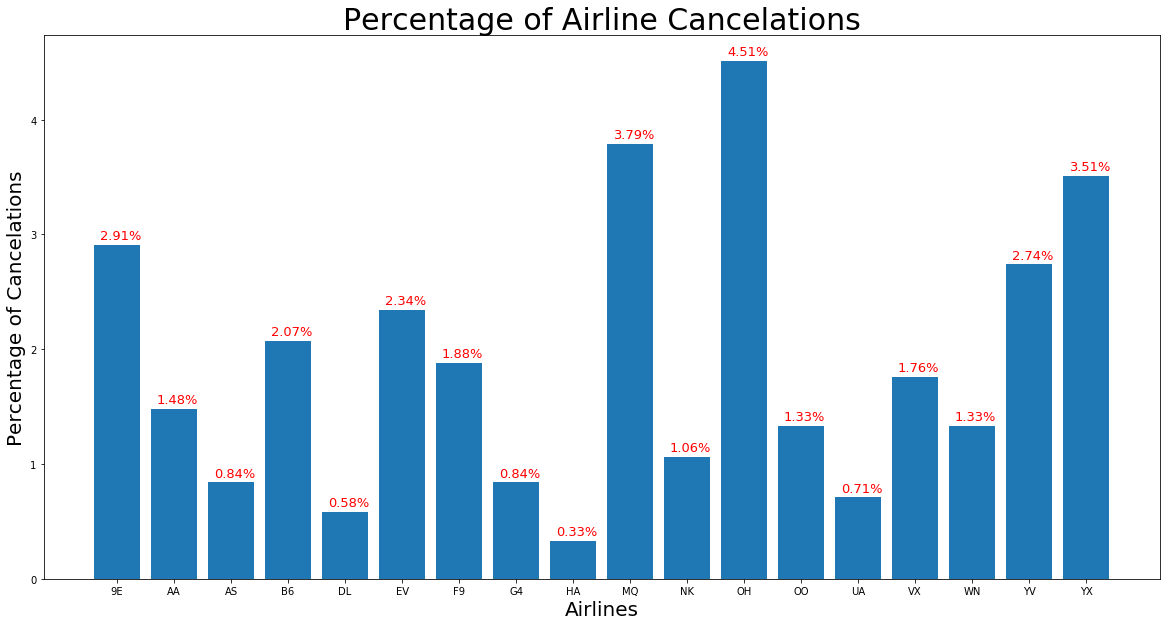

In [526]:
plt.figure(figsize=(20,10))
plt.bar(carrier, carry)
plt.title("Airline Cancelations", fontsize =30)
plt.xlabel('Airline', fontsize =20)
plt.xticks(range(18))
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(range(18), carry):
    plt.text(a - .38, b + 100, str(b), fontsize =15, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(carrier, a_pct)
plt.title("Percentage of Airline Cancelations", fontsize =30)
plt.xlabel('Airlines', fontsize =20)
plt.xticks(range(18))
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(range(18), a_pct):
    plt.text(a -.3, b +.05, str(b) + '%', fontsize =13, color ='r')
plt.show()

## Airports

In [13]:
# get airports and their counts for airports with most canceled
p = cancel['ORIGIN'].value_counts() 
airport = set(cancel['ORIGIN'])
port = [x for x in airport if p[x] >=1000]
val = [p[x] for x in airport if p[x] >=1000]

In [14]:
o = yearly['Airports']

In [15]:
# remove airports without cancellations 
no_cancel ={}
for air in o:
    if air not in airport:
        no_cancel.update({air : o[air]})

for c in no_cancel:
    print(c)
    del o[c]

YUM
CNY
ELM
WYS
SMX
PRC
HGR
IFP
EAR
AKN
YNG


In [16]:
# find pct of cancelations per high cancelation airports
p_pct =[]
b=0
for x in port:
    p_pct.append(round((val[b]/o[x])* 100,2))
    b+=1

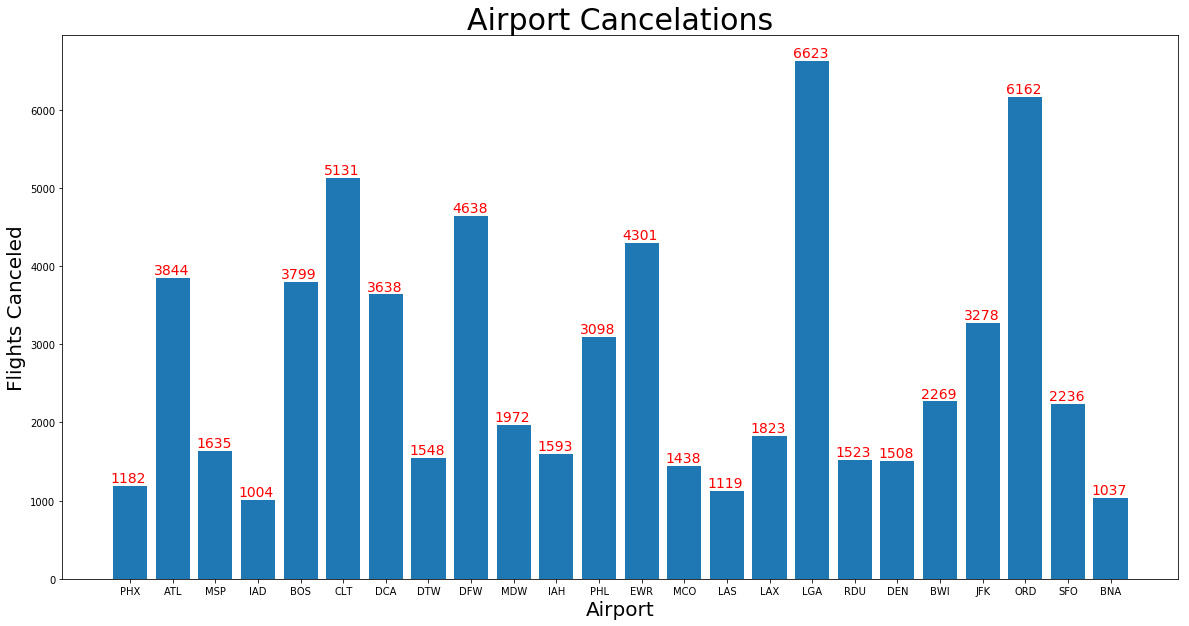

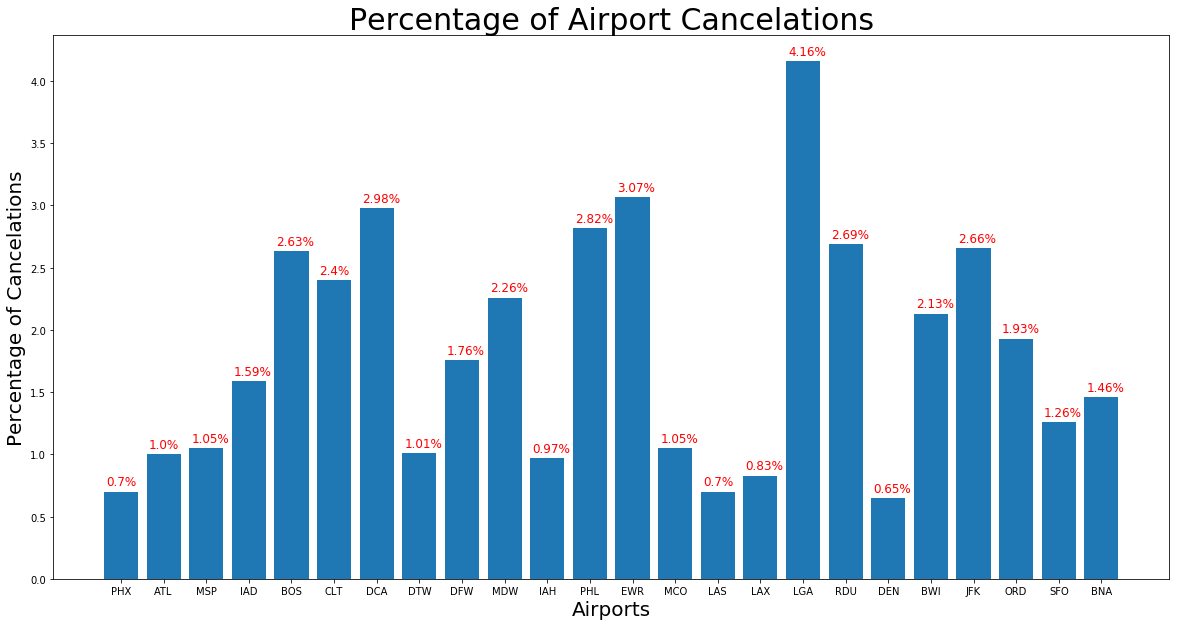

In [532]:
plt.figure(figsize=(20,10))
plt.bar(port, val)
plt.title("Airport Cancelations", fontsize =30)
plt.xlabel('Airport', fontsize =20)
plt.xticks(range(24))
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(range(24), val):
    plt.text(a -.45, b +50, str(b), fontsize =14, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(port, p_pct)
plt.title("Percentage of Airport Cancelations", fontsize =30)
plt.xlabel('Airports', fontsize =20)
plt.xticks(range(24))
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(range(24), p_pct):
    plt.text(a -.35, b +.05, str(b) + '%', fontsize =12, color ='r')
plt.show()

In [122]:
no_cancel

{'YUM': 1355,
 'CNY': 313,
 'ELM': 267,
 'WYS': 239,
 'SMX': 135,
 'PRC': 118,
 'HGR': 113,
 'IFP': 106,
 'EAR': 97,
 'AKN': 63,
 'YNG': 2}

In [18]:
# get airports and their counts for high traffic airports
# hundo_thou = [x for x in o if o[x] >=100000]
# full len 344, in thousands len 246, in five thousands len 135
# in ten thousands len 98, in fifty thousads len 39, in hundred thousand len 22
busy =[]
for x in o:
    if len(busy)<25:
        busy.append(x)
    else:
        break


In [19]:
busy_cancel = [round((p[x]/o[x])*100, 2) for x in busy]

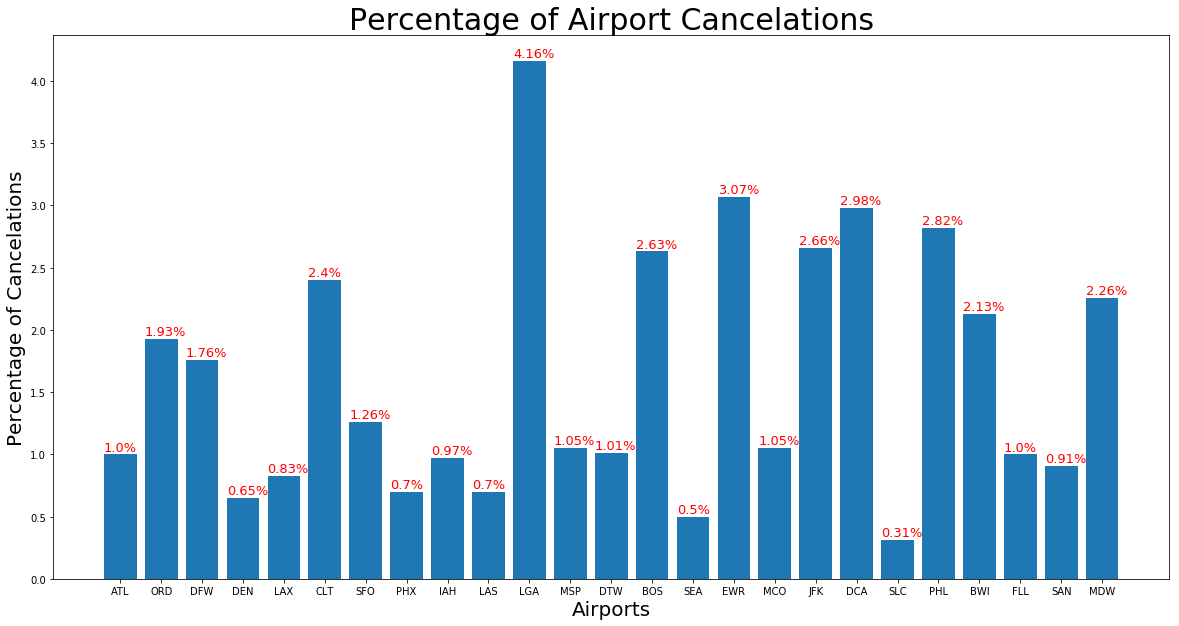

In [536]:
plt.figure(figsize=(20,10))
plt.bar(busy, busy_cancel)
plt.title("Percentage of Airport Cancelations", fontsize =30)
plt.xlabel('Airports', fontsize =20)
plt.xticks(range(25))
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(range(25), busy_cancel):
    plt.text(a -.4, b +.03, str(b) + '%', fontsize =13, color ='r')
plt.show()

## Day of Week

In [20]:
# get amount of cancels per day of week
week = cancel['DAY_OF_WEEK'].value_counts()
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekfreq = [week[x] for x in range(1,8)]

In [21]:
# find pct of cancelations per day of week
w = yearly['Weekday']
w_pct = []

#get a list of what % of flights were canceled per day of week
for x in range(len(w)):
    w_pct.append(round((weekfreq[x]/w[x+1]) * 100,2))

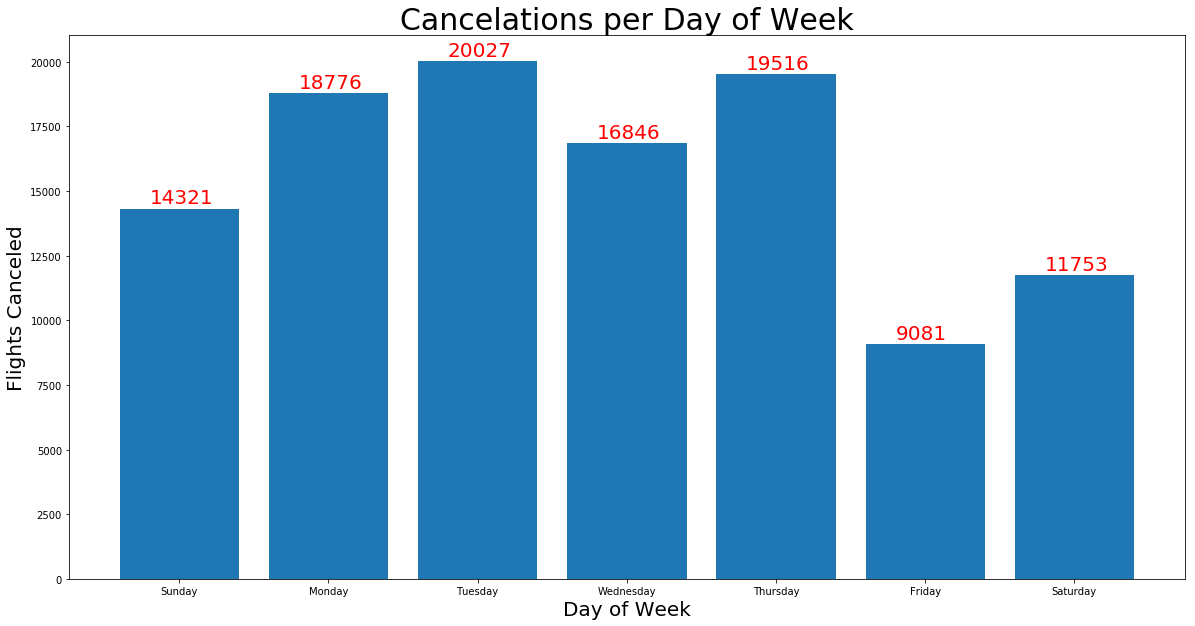

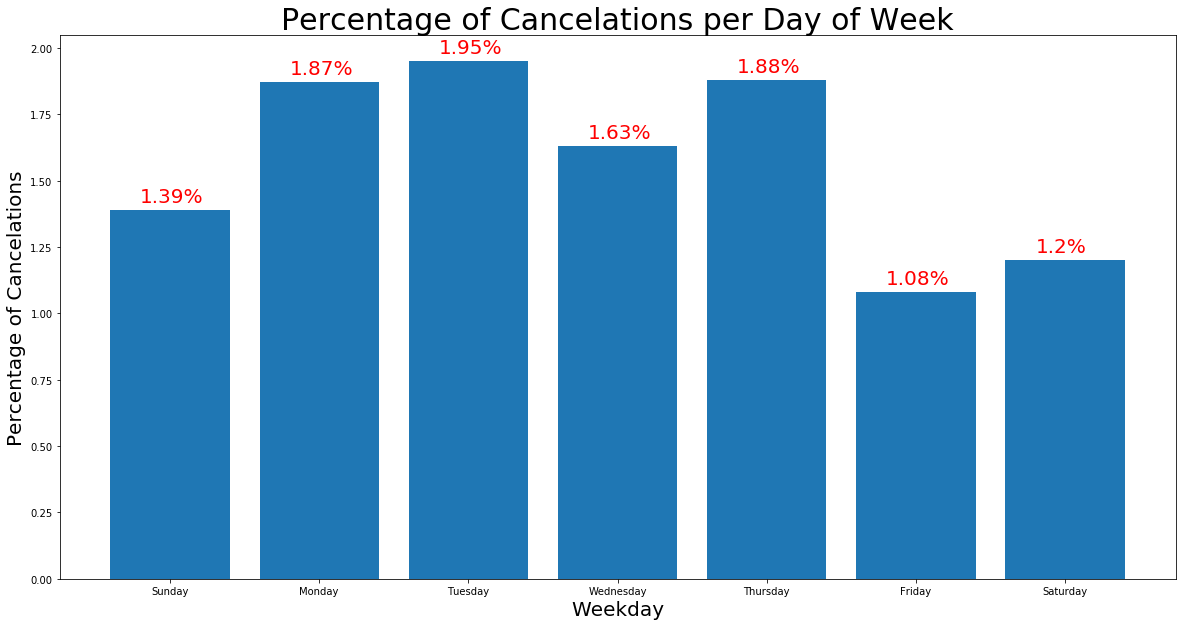

In [540]:
plt.figure(figsize=(20,10))
plt.bar(weekday, weekfreq)
plt.title("Cancelations per Day of Week", fontsize =30)
plt.xlabel('Day of Week', fontsize =20)
plt.xticks(range(7))
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(range(7), weekfreq):
    plt.text(a -.2, b +200, str(b), fontsize =20, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(weekday, w_pct)
plt.title("Percentage of Cancelations per Day of Week", fontsize =30)
plt.xlabel('Weekday', fontsize =20)
plt.xticks(range(7))
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(range(7), w_pct):
    plt.text(a -.2, b +.03, str(b) + '%', fontsize =20, color ='r')
plt.show()

## Departure Times

In [22]:
# rounding hours to nearest o'clock
dept = cancel['CRS_DEP_TIME'].apply(lambda x: round(x/100,2))

pos = 0
for d in dept:
    dec = (math.modf(d))
    if round(dec[0], 2) >= .29:
        dept[pos] = int(dept[pos]) +1 
    else:
        dept[pos] = int(dept[pos])
    pos +=1
    

In [23]:
# get amount of cancels per hour
hour = [x for x in range(25)]
time = dept.value_counts()
timefreq = [time[x] for x in range(25)]

In [24]:
# find pct of cancelations per hour
h = yearly['Hour']
h_pct = []

#get a list of what % of flights were canceled per hour
for x in range(len(h)):
    h_pct.append(round((timefreq[x]/h[x]) * 100,2))

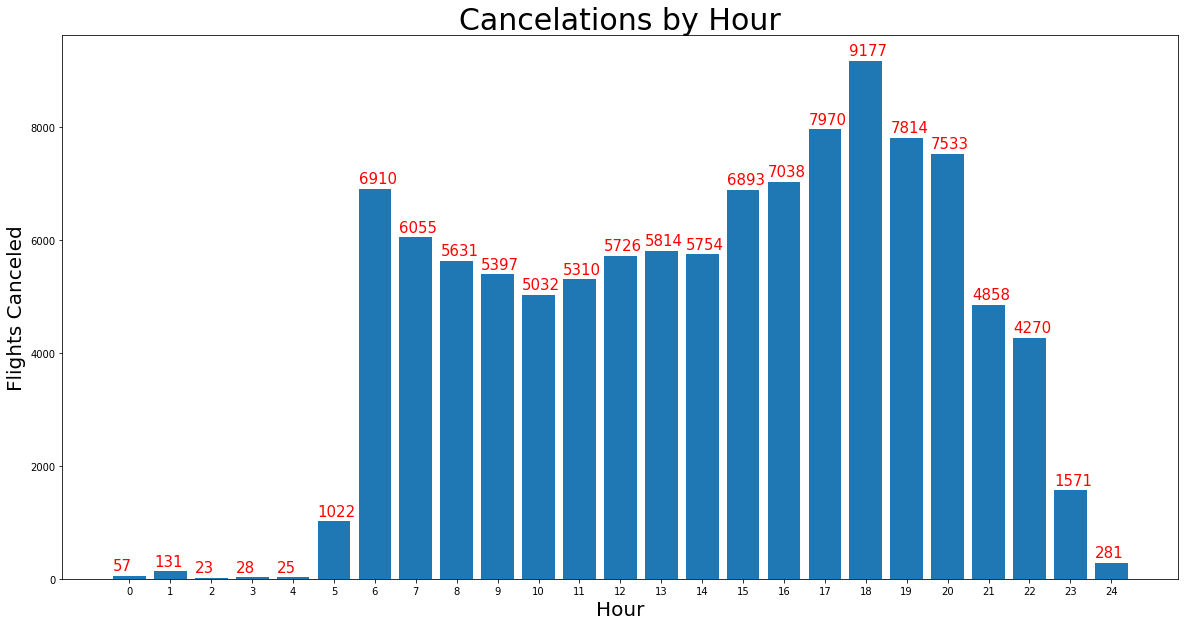

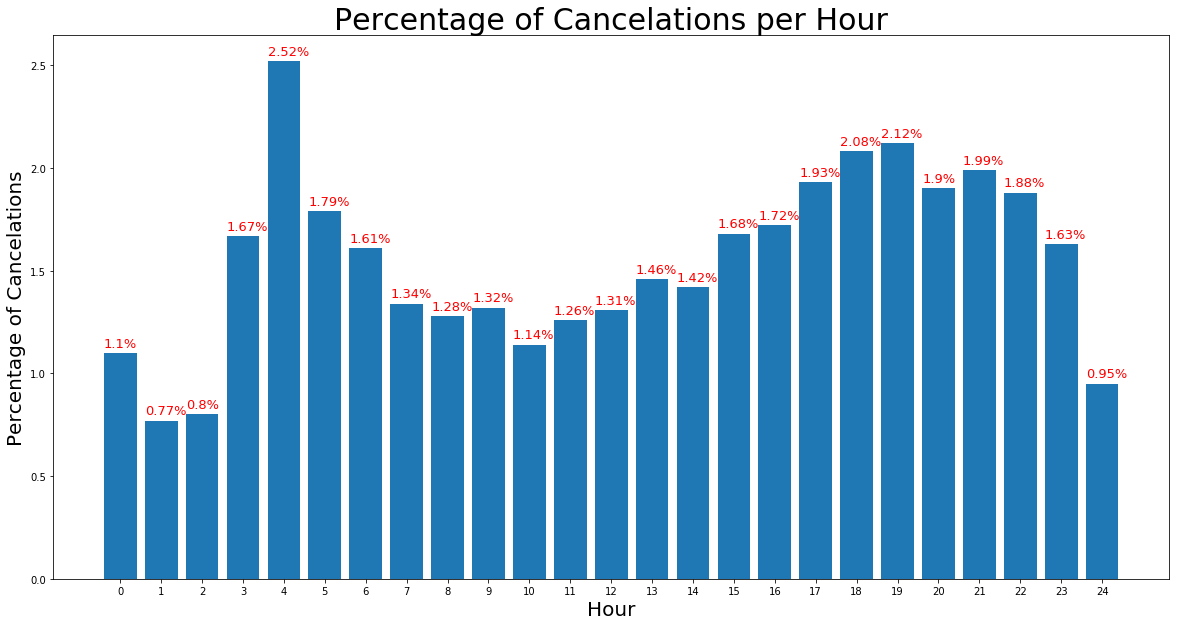

In [499]:
plt.figure(figsize=(20,10))
plt.bar(hour, timefreq)
plt.title("Cancelations by Hour", fontsize =30)
plt.xlabel('Hour', fontsize =20)
plt.xticks(range(0,25))
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(hour, timefreq):
    plt.text(a - .4, b +100, str(b), fontsize =15, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(hour, h_pct)
plt.title("Percentage of Cancelations per Hour", fontsize =30)
plt.xlabel('Hour', fontsize =20)
plt.xticks(range(0,25))
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(hour, h_pct):
    plt.text(a - .4, b +.03, str(b) + '%', fontsize =13, color ='r')
plt.show()

## Time of day for departure

In [25]:
# divide day into four parts
morning = cancel[(cancel['CRS_DEP_TIME'] >= 500) & (cancel['CRS_DEP_TIME'] <= 1200)]

afternoon = cancel[(cancel['CRS_DEP_TIME'] >= 1201) & (cancel['CRS_DEP_TIME'] <= 1700)]

evening = cancel[(cancel['CRS_DEP_TIME'] >= 1701) & (cancel['CRS_DEP_TIME'] <= 2100)]

night = cancel[(cancel['CRS_DEP_TIME'] >= 2101) | (cancel['CRS_DEP_TIME'] < 500)]

daypart =['Morning', 'Afternoon', 'Evening', 'Night']
day =[len(morning), len(afternoon), len(evening), len(night)]

In [26]:
# find pct of cancelations per part of day
d = yearly['Part of Day']
d_pct = []

#get a list of what % of flights were canceled per part of day
b=0
for x in d:
    d_pct.append(round((day[b]/d[x]) * 100,2))
    b+=1

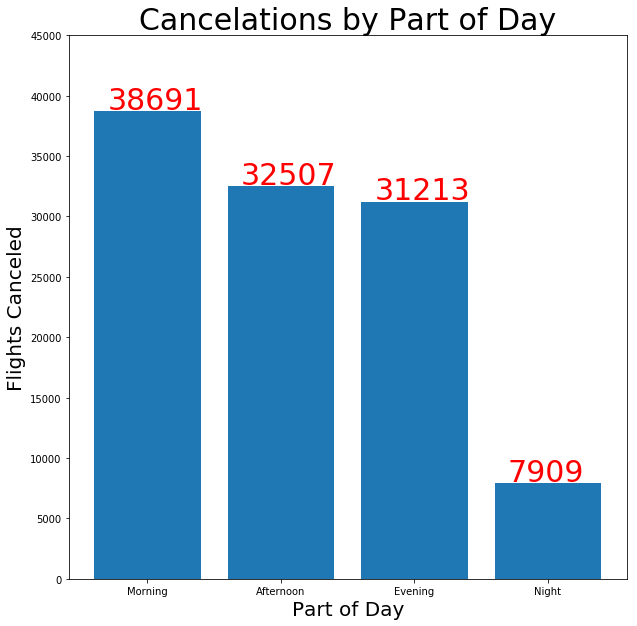

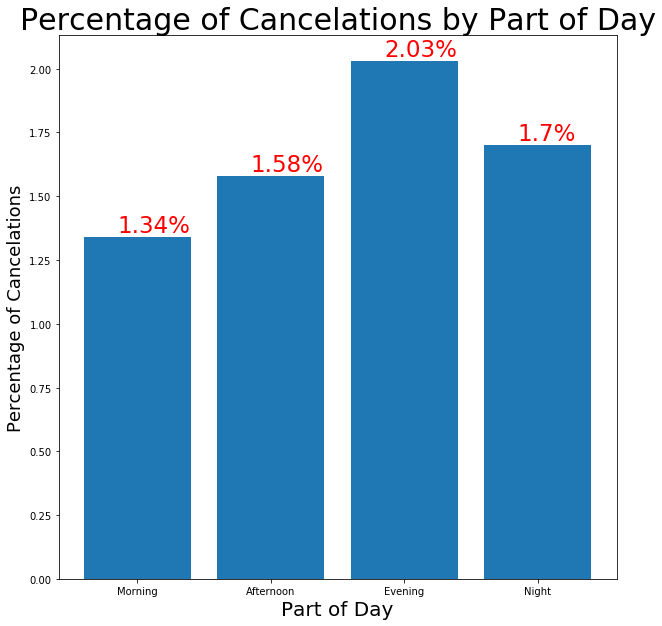

In [42]:
plt.figure(figsize=(10,10))
plt.bar(daypart, day)
plt.title("Cancelations by Part of Day", fontsize =30)
plt.xlabel('Part of Day', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Flights Canceled', fontsize =20)
plt.yticks(range(0, 50000, 5000))
for a,b in zip(range(4), day):
    plt.text(a -.3, b +200, str(b), fontsize =30, color ='r')
plt.show()

plt.figure(figsize=(10,10))
plt.bar(daypart, d_pct)
plt.title("Percentage of Cancelations by Part of Day", fontsize =30)
plt.xlabel('Part of Day', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Percentage of Cancelations', fontsize =18)
for a,b in zip(range(4), d_pct):
    plt.text(a -.15, b+.02, str(b) + '%', fontsize =23, color ='r')
plt.show()

## Cancellation codes

"A" = "Carrier"<br>
"B" = "Weather"<br>
"C" = "National Air System"<br>
"D" = "Security"<br>

In [388]:
cancel['CANCELLATION_CODE'].value_counts()

B    57756
A    28153
C    24338
D       73
Name: CANCELLATION_CODE, dtype: int64

In [27]:
A = cancel[cancel['CANCELLATION_CODE'] == 'A']
B = cancel[cancel['CANCELLATION_CODE'] == 'B']
C = cancel[cancel['CANCELLATION_CODE'] == 'C']
D = cancel[cancel['CANCELLATION_CODE'] == 'D']

In [28]:
code_let =['A', 'B', 'C', 'D']
code_amt = [len(A),len(B),len(C),len(D)]

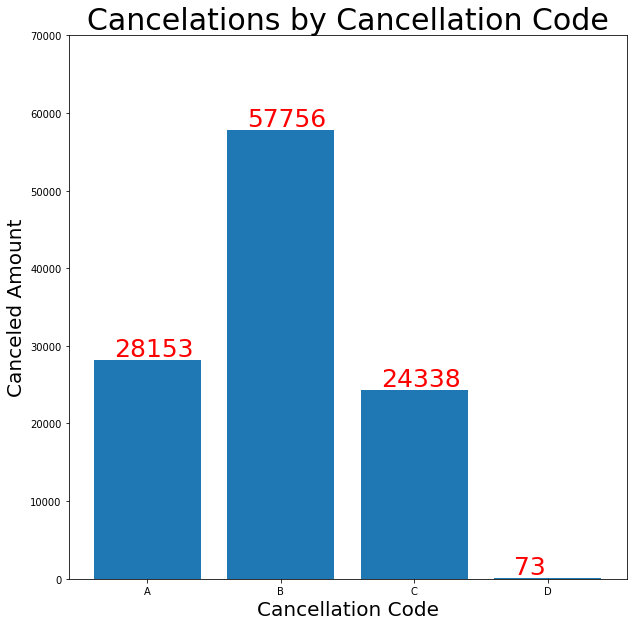

In [32]:
plt.figure(figsize=(10,10))
plt.bar(code_let, code_amt)
plt.title("Cancelations by Cancellation Code", fontsize =30)
plt.xlabel('Cancellation Code', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Canceled Amount', fontsize =20)
plt.yticks(range(0, 75000, 10000))
for a,b in zip(range(4), code_amt):
    plt.text(a-.25, b+ 500, str(b), fontsize =25, color ='r')
plt.show()